# Fundamentos de Aprendizaje Automático y Reconocimiento de Patrones
***
# Práctico 5

## Objetivos

- Implementar desde cero una red neuronal de dos capas
- Utilizar la implementación para:
    - Clasificar datos sintéticos 
    - Clasificar entre imágenes de gatos y no gatos
- Adquirir cierta intuición sobre las fronteras de decisión determinadas por una red neuronal

## Lista de ejercicios

[Ejercicio 1](#Ejercicio1): implementación de una red neuronal de dos capas       
[Ejercicio 2](#Ejercicio2): jugando con tensorflow playground   

## Importar bibliotecas

In [1]:
# Se importan las bibliotecas que se utilizarán
import time
import h5py
import matplotlib.pyplot as plt
import numpy as np
import fuaa_utils as fuaa

# Ajustar parámetros de matplotlib
plt.rcParams["figure.figsize"] = (7, 5)  # set default size of plots
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"
%matplotlib inline

# Ejercicio 1: Implementación de una red neuronal de dos capas
<a id="Ejercicio1"></a>

## Notación

- En general, la arquitectura de una red de $L$ capas de define mediante el vector $\mathbf{d}=[d^{(0)},d^{(1)},\ldots, d^{(L)}]$, siendo $d^{(l)}$ el número de nodos de la capa $l$.
- En una red neuronal de dos capas, es decir con $L=2$, con $l=0$ se referirá a la entrada (no se la considera una capa) y con $l=2$ se referirá a la capa de salida.     
- A la señal de entrada a la activación $j$ de la capa $l$ se le llamará $s_j^{(l)}$ y a la de salida $x_j^{(l)}$. Así, por ejemplo:
    - La coordenada $j$ del vector de características $\mathbf{x^{(0)}}$ es $x_j^{(0)}$     
    - La coordenada $j$ del vector de salida $\mathbf{x^{(L)}}$ es $x_j^{(L)}$

## Descripción del ejercicio

Se implementarán algunos de los elementos constitutivos de una red neuronal que más se utilizan en la práctica.  Con ellos se construirán un par de redes neuronales de dos capas. En este ejercicio se limitará la profundidad de la red a 2 para evitar entrar en los detalles de implementación propios de una red muy general. No obstante, los bloques a implementar se diseñaron de forma que conceptualmente sean similares a los que se utilizarían en una red neuronal más profunda. A continuación se muestra un diagrama de bloques de la red neuronal que se implementará y se describen los distintos bloques.

<img src="img/diagrama_de_bloques.png" alt="drawing" width="500"/>

- **Inicializar parámetros:** Inicializa los parámentros de la red. A los pesos de la capa $l$ de la red le llamaremos $W_l$, $b_l$ con $l=1,2$.
- **Propagación hacia adelante:** La *propagación hacia adelante*  o *forward propagation* consiste en estimar la salida de la red a partir de la entrada. Cada nodo o capa de la red tiene un método *forward* asociado. En este ejercicio se implementarán los métodos forward asociados a los siguientes bloques:
        - Afin
        - Activacion 
        - Afin --> Activacion
- **Loss:** Calcula el valor de la función de costo a optimizar. Se implementarán dos funciones de costo:
        - Entropía cruzada
        - Error cuadrático medio
- **Propagación hacia atrás:** Durante la *propagación hacia atrás* o *backpropagation* se calculan los gradientes necesarios para actualizar los parámetros de la red. Se implementarán métodos *backward* para los siguientes bloques:
        - Afin
        - Activacion 
        - Afin --> Activacion
- **Update:** Es el boque encargado de actualizar los parámetros. Para ello utiliza los gradientes calculados durante la *propagación hacia atrás* y un método de optimización. En este práctico se utilizará *descenso por gradiente* como método de optimización.

## 1. Bloque de Inicialización

Se implementará el bloque de inicialización para el caso de una red neuronal de dos capas con la siguiente estructura:
        
        Afin --> Activacion 1 --> Afin --> Activacion 2

**Ejercicio:** Completar la implementación de `inicializar_pesos()`. Los pesos $W_l$ serán inicializados en valores aleatorios pequeños. Los pesos correspondientes a términos de *bias* se inicializarán a cero.

In [2]:
def inicializar_pesos(d_0, d_1, d_2, tipo="aleatoria", std_ruido=0.01, semilla=1):
    """
    Entrada:
        d_0: dimensión del vector de características
        d_1: número de nodos de la capa oculta
        d_2: número de nodos de la capa de salida
        tipo: string que indica el tipo de inicialización a utilizar en los pesos
              'aleatoria': inicializa los pesos a valores aleatorios con distribución
                           gaussiana. Los términos de bias se inicializan a cero.
        std_ruido: desviación estándar del ruido gaussiano
        semilla: semilla a utilizar para generar los valores aleatorios

    Salida:
        diccionario con los siguientes pares clave-valor:
            W1: matriz de pesos de la capa 1 de tamaño (d_0, d_1)
            b1: vector de bias de la capa 1 de tamaño (d_1)
            W2: matriz de pesos de capa 2 de tamaño (d_1, d_2)
            b2: vector de bias de la capa 2 de tamaño (d_2)
    """

    np.random.seed(semilla)

    if tipo == "aleatoria":

        #####################################################
        ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
        #####################################################
        W1 = np.random.normal(0,std_ruido,(d_0,d_1))

        W2 = np.random.normal(0,std_ruido,(d_1,d_2))
        
        b1 = np.zeros(d_1)
        b2 = np.zeros(d_2)

        #####################################################
        ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
        #####################################################

    # Se genera el diccionario con los valores inicializados
    parametros = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

    return parametros

In [3]:
# Validar inicializar_pesos()
fuaa.validar_resultado("inicializar_pesos", funcion=inicializar_pesos)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensiones de W1 validadas.
 Dimensiones de b1 validadas.
 Dimensiones de W2 validadas.
 Dimensiones de b2 validadas.
 Cálculo de W1 validado.
 Cálculo de b1 validado.
 Cálculo de W2 validado.
 Cálculo de b2 validado.
+-------------------------------------------------------------------------+


**Observación:** *La inicialización de pesos en este caso fue aleatoria. Con redes de pocas capas esta inicialización suele producir buenos resultados. Sin embargo, a medida que aumenta la profundidad de la red la correcta inicialización de los parámetros adquiere una relevancia mayor. Quien quiera profundizar en la importancia de la inicialización en el caso de redes profundas puede consultar:* 

* [Glorot, Xavier, and Yoshua Bengio. “Understanding the difficulty of
    training deep feedforward neural networks.” International Conference on Artificial Intelligence and Statistics. 2010.](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
* [He, Kaiming, et al. “Delving deep into rectifiers: Surpassing human-level
    performance on imagenet classification.” arXiv preprint arXiv:1502.01852 (2015).](https://arxiv.org/pdf/1502.01852v1.pdf)

## 2. Bloques Forward

En esta sección se implementarán los métodos *forward* de los componentes de la red neuronal de dos capas que vamos a utilizar. Observar que la capa oculta tiene un número $d^{(1)}$ de nodos mientras que la de salida tiene 1 un solo nodo. Además observar que en cada nodo se realiza una *transformación afin* de los datos de entrada y luego se pasa el resultado por una *función de activación*.

<img src="img/red_dos_capas.png" alt="drawing" width="600"/>

En particular, se implementarán los métodos *forward* de los siguientes bloques: 

- Bloque `Afín`
- Bloque `Activación` donde la activación puede ser ReLU, Sigmoide o TangenteH.
- Bloque `Afín -> Activación`  

### 2.1. `Afin` forward 

La señal de entrada a la activación de la capa $\textit{l}$ puede escribirse como:

$$
\mathbf{s}^{(l)}=\left( W^{(l)} \right)^T \mathbf{x}^{(l-1)}+ \mathbf{b}^{(l)}   \tag{1}
$$

donde $\mathbf{s}^{(l)}$ y $\mathbf{b}^{(l)}$ son vectores de tamaño $d^{(l)}$, $\mathbf{x}^{(l-1)}$  es un vector de tamaño $d^{(l-1)}$ y $W^{(l)}$ es una matriz de tamaño $d^{(l-1)} \times d^{(l)}$.

**Observación:** *Esta forma de escribir $\mathbf{s}^{(l)}$ es levemente distinta a la expresión del libro, en la que todos los parámetros de la capa se agrupan en una matriz $W^{(l)}$ de tamaño $d^{(l-1)+1} \times d^{(l)}$. En esta expresión se desacoplan los parámetros de bias y se indican mediante el vector $\mathbf{b}^{(l)}$. Una ventaja práctica que tiene desacoplar los parámetros de bias es que $\mathbf{x}^{(l)}=\theta \left(\mathbf{s}^{(l)}\right) $ en vez de la expresión en coordenadas homogéneas $\mathbf{x}^{(l)}= \left[ 1 , \left( \theta \left(\mathbf{s}^{(l)}\right) \right)^T \right]^T $ que utiliza el libro del curso.*

La ecuación (1) es válida cuando la entrada a la capa es un único vector $\mathbf{x}^{(l-1)}$. En la práctica es más habitual procesar un $\textit{batch}$ de vectores de entrada a la vez, por lo tanto es deseable contar con una expresión que genere la salida para todos los vectores de entrada a la vez. Al evitar la utilización de un bloque $\textit{for}$ que itere por cada una de las muestras del $\textit{batch}$ se mejora la eficiencia de la implementación.   


La versión de la ecuación (1) que actúa sobre un conjunto de muestras a la vez es la siguiente:

$$
S^{(l)} = X^{(l-1)}W^{(l)} + \mathbf{b}^{(l)} \tag{2}
$$

donde $X^{[0]} = X$, siendo $X$ una matriz que contiene *un vector de características en cada fila*.

**Ejercicio**: Implementar el método `afin_forward()` utilizando la versión eficiente dada por la ecuación (2).

In [4]:
def afin_forward(X, W, b):
    """
    Implementa la propagación hacia adelante en una capa afin.

    Entrada:
        X: matriz de tamaño (N, dim_capa_anterior) que en cada fila contiene
           un vector de activaciones de la capa anterior (o datos de
           entrada)
        W: matriz de pesos de tamaño (dim_capa_anterior, dim_capa_actual)
        b: vector de bias de tamaño (dim_capa_actual,)

    Salida:
        S: matriz de tamaño (N, dim_capa_actual) que contiene los scores o
           señal de entrada a la activación
        cache: (X, W, b) tupla que contiene X, W y b. Son almacenados para
               calcular el paso backward eficientemente
    """

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################
    
    S = X@W + b

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    cache = (X, W, b)

    return S, cache

In [5]:
# Validar afin_forward (solo la salida)
fuaa.validar_resultado("afin_forward", funcion=afin_forward)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensión de la salida validada.
 Resultado validado.
+-------------------------------------------------------------------------+


### 2.2. Funciones de activación

En este notebook se implementarán tres de las funciones de activación más utilizadas, con $S$ dado por la ecuación (2):

- **Sigmoide**: $\sigma(S) = \frac{1}{ 1 + e^{-S}}$. Esta función devuelve, además de la activación resultante, la variable cache que contiene la señal `S` que dio lugar a la activación (se utiliza luego durante la propagación hacia atrás).

``` python
X, cache = sigmoid(S)
```

- **Tangente Hiperbólica**: $\tanh(S) = \frac{e^S-e^{-S}}{e^S+e^{-S}}$. Esta función devuelve, además del resultado de *np.tanh(S)*, la variable cache que contiene la señal `S` que dio lugar a la activación (se utiilza luego durante la propagación hacia atrás).       

``` python
X, cache = tanh(S)
```


- **Rectified Linear Unit**:  $ReLU(S) = \max(0, S)$.  Esta función devuelve además de la activación resultante, la variable cache que contiene la señal `S` que dio lugar a la activación (se utiilza luego durante la propagación hacia atrás).

``` python
X, cache = relu(S)
```

In [6]:
def sigmoide(S):
    """
    Implementa la activación sigmoide.

    Entrada:
        S: arreglo numpy que contiene las entradas a la activación.
           Las dimensiones de entrada no están definidas.

    Salida:
        X: arreglo del mismo tamaño que S que contiene la salida de sigmoid(S)
        cache: devuelve S para utilizar durante la propagación hacia atrás
    """

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    # cache =
    #N = np.size(S[0])
    #d = np.size(S[1])
    #X = np.zeros((N,d))
    #for j in range (N):
    #    for i in range (d):
    #        exp = (-S[j,i])
    #        print(exp)
    #        X[j,i] = 1 / (1+ np.e ** exp)
    
    X = 1/(1+np.exp(-S))
    cache =  S
    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return X, cache

In [7]:
# Validar sigmoide.
fuaa.validar_resultado("sigmoide", funcion=sigmoide)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensiones de la salida validadas.
 Salida "cache" validada.
 Cálculo de la salida validado.
+-------------------------------------------------------------------------+


In [8]:
def tanh(S):
    """
    Implementa la activación tangente hiperbólica

    Entrada:
        S: arreglo numpy que contiene las entradas a la activación.
           Las dimensiones de entrada no están definidas.

    Salida:
        X: arreglo del mismo tamaño que S que contiene la salida de tanh(S)
        cache: devuelve S para utilizar durante la propagación hacia atrás
    """

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    X = np.tanh(S)
    cache = S

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return X, cache

In [9]:
# Validar la tangente hiperbólica.
fuaa.validar_resultado("tanh", funcion=tanh)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensiones de la salida validadas.
 Salida "cache" validada.
 Cálculo de la salida validado.
+-------------------------------------------------------------------------+


In [10]:
def relu(S):
    """
    Implementa la activación relu

    Entrada:
        S: arreglo numpy que contiene las entradas a la activación.
           Las dimensiones de entrada no están definidas.

    Salida:
        X: arreglo del mismo tamaño que S que contiene la salida de relu(S)
        cache: devuelve S para utilizar durante la propagación hacia atrás
    """

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    
    X = np.maximum(0,S)
    cache = S

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return X, cache

In [11]:
# Validar la función Rectified Linear Unit.
fuaa.validar_resultado("relu", funcion=relu)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensiones de la salida validadas.
 Salida "cache" validada.
 Cálculo de la salida validado.
+-------------------------------------------------------------------------+


### 2.3. Aplicación conjunta de capa afín y activación: `Afin --> Activacion` forward

Cuando se implementan redes profundas es conveniente agrupar varias funciones en una sola operación. Para ejemplificar, en este caso crearemos una capa que aplique la transformación afín y una de las activaciones disponibles. 

**Ejercicio**: Implementar la propagación hacia adelante de una capa `Afin --> Activacion`. El método `afin_activacion_forward()` implementa la operación:

$$
X^{(l)} = \theta(S^{(l)}) = \theta(X^{(l-1)}W^{(l)} +b^{(l)})
$$

donde la activación $\theta(\cdot)$ será alguna de las implementadas. Se deberá hacer uso de `afin_forward()` y de la función de activación pasada como argumento. 

In [12]:
def afin_activacion_forward(X_prev, W, b, activacion):
    """
    Implementa la propagación hacia adelante para una capa Afin-->Activación.

    Entrada:
        X_prev: arreglo de tamaño (N, dim_capa_anterior) que contiene la
                activación de la capa anterior (o datos de entrada):
        W: matriz de pesos de tamaño (dim_capa_anterior, dim_capa_actual)
        b: vector de bias de tamaño (dim_capa_actual)
        activacion: la activacion a utilizar en esta capa se indica con uno de los
                    siguientes strings: 'sigmoide', 'tanh' o 'relu'

    Salida:
        X: arreglo de tamaño (N, dim_capa_actual) que contiene la salida
           de la función de activación
        cache: tupla que contiene "cache_afin" y "cache_activacion".
               Se almacenan para calcular la propagación hacia atrás eficientemente
    """

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    S, cache_afin = afin_forward(X_prev, W, b)
    if activacion == 'sigmoide':
        X, cache_activacion = sigmoide(S)
    if activacion == 'tanh':
        X, cache_activacion = tanh(S)
    if activacion == 'relu':
        X, cache_activacion = relu(S)
    

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    cache = (cache_afin, cache_activacion)

    return X, cache

In [13]:
# Validar la capa Afin->Activación
fuaa.validar_resultado("afin_activacion_forward", funcion=afin_activacion_forward)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensiones de la salida sigmoide validada.
 Cálculo de la salida sigmoide validado.
 Dimensiones de la salida tanh validada.
 Cálculo de la salida tanh validado.
 Dimensiones de la salida relu validada.
 Cálculo de la salida relu validado.
+-------------------------------------------------------------------------+


## 3. Función de costo

En esta sección se implementarán dos de las funciones de costo más utilizadas.  

- **Entropía cruzada:** Es la función de costo más utilizada en problemas de clasificación binaria. Se recuerda que la misma se define mediante la fórmula:
$$
H(\mathbf{\mathbf{x}^{(L)}}, \mathbf{y})= -\frac{1}{N} \sum\limits_{n = 1}^{N} \left( y_n\log x^{(L)}_n + (1-y_n)\log\left(1- x^{(L)}_n\right) \right) \tag{3}
$$

- **Error cuadrático medio:** Es la función de costo más utilizada en problemas de regresión. Se recuerda que la misma se define mediante la fórmula:
$$
\mathrm{MSE}(\mathbf{x}^{(L)}, \mathbf{y})= \frac{1}{2N} \sum\limits_{n = 1}^{N} \left(y_n - x^{(L)}_n \right)^2 \tag{4}
$$

**Ejercicio**: Implementar los método `mse()` y `entropia_cruzada()`. Observar que en ambos casos la función deberá devolver, además del costo, el gradiente del costo respecto al vector $\mathbf{x}^{(L)}$ (salida de la red y entrada del bloque *Loss*).

In [14]:
def mse(xL, y):
    """
    Implementa el error cuadratico medio como función de costo de una red neuronal con
    una sola capa de salida.

    Entrada:
        xL: vector de dimensión (N,1) que contiene las salidas generadas por la red
            neuronal para N muestras.
        y:  vector de dimensión (N,1) que contiene las salidas esperadas.

    Salida:
        costo: escalar con el costo calculado
        dxL: gradiente del costo respecto a xL, tiene las mismas dimensiones que xL
    """

    N = len(y)

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################
    #costo = 0
    #dxL = []
    #for i in range(N):
    #    suma = y[i]*np.log(xL[i])+(1-y[i])*np.log(1-xL[i])
    #    dsuma = y[i]/xL[i] - (1-y[i])/(1-xL[i]) + np.log(xL[i])
    #    dxL.append(dsuma/N)
    #    costo = costo + suma
    #costo = costo / N
    
    costo = (1/(2*N))*np.sum((y-xL)**2)     
    dxL = (xL - y)/N 
    #dxL = 0
    #for i in range(N):
    #    suma = y[i]/xL[i] - (1-y[i])/(1-xL[i]) + np.log(xL[i]) - np.log(1-xL[i]) #- (1-y[i])*np.log(1-xL[i])
    #    dxL = dxL + suma
    #dxL = dxL/N

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    # Para asegurarnos que la salida sea un escalar (Ej: transforma [[12]] en 12).
    costo = np.squeeze(costo)

    return costo, dxL

In [15]:
# Validar error cuadratico medio como función de costo de una red neuronal.
fuaa.validar_resultado("mse", funcion=mse)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensiones de costo validadas.
 Dimensiones de dxL validadas.
 Cálculo del costo validado.
 Cálculo del gradiente validado.
+-------------------------------------------------------------------------+


In [16]:
def entropia_cruzada(xL, y):
    """
    Implementa la entropía cruzada

    Entrada:
        xL: vector de dimensión (N,1) que contiene las "probabilidades"
            de pertenecer a la clase positiva estimadas por el modelo
        y: vector de etiquetas de dimesión (N,1) (con unos para la clase
           positiva y 0 para la negativa)

    Salida:
        costo: escalar con el costo calculado
        dxL: gradiente del costo respecto a xL, tiene las mismas dimensiones que xL
    """

    N = len(y)

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    costo = -np.sum(y*np.log(xL) + (1-y)*np.log(1-xL))/N
    
    dxL = -((y/xL)+(y-1)/(1-xL))/N ######REVISAR ESTA CUENTA
    # costo =

    # dxL =

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    # Para asegurarnos que la salida sea un escalar (Ej: transforma [[12]] en 12).
    costo = np.squeeze(costo)
    return costo, dxL

In [17]:
# Validar la entropia_cruzada.
fuaa.validar_resultado("entropia_cruzada", funcion=entropia_cruzada)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensiones de costo validadas.
 Dimensiones de dxL validadas.
 Cálculo del costo validado.
 Cálculo del gradiente validado.
+-------------------------------------------------------------------------+


## 4. Propagación hacia atrás

Al igual que como se hizo con la propagación hacia adelante, se implementarán funciones de ayuda para realizar la propagación hacia atrás. Se recuerda que la propagación hacia atrás se utiliza para calcular el gradiente de la función de costo respecto a los parámetros de la red. 

<img src="img/diagrama_backpropagation.png" style="width:8=1012px;height:223px;">
<caption><center>Propagación hacia adelante y atrás en una red de dos capas con arquitectura: <code>Afin --> Activacion 1 --> Afin --> Activacion 2</code><br></center></caption>  

A continuación se implementará la versión *backward* de cada una de las funciones *forward* implementadas anteriormente. Es decir, se implementarán las siguientes funciones de propagación hacia atrás:
- `afin_backward()`
- `ACTIVACION_backward()` donde `ACTIVACION` puede ser *ReLU*, *sigmoide* o *tanh*
- `afin_activacion_backward()`

### 4.1. `Afin` backward

Durante la propagación hacia adelante en la capa $l$ (sin considerar la activación) se calcula para una muestra: 

$$
\mathbf{s}^{(l)}=\left( W^{(l)} \right)^T \mathbf{x}^{(l-1)}+ \mathbf{b}^{(l)}   \tag{1}
$$

Si se llama $e_n$ al costo debido a la muesta $n$ y se asume conocido el *vector de sensibilidad* $\delta^{(l)}=\frac{\partial e_n}{\partial \mathbf{s}^{(l)}}$, en el teórico del curso se vio que 

$$
\frac{\partial{e_n}}{\partial{W^{(l)}}}=\mathbf{x}^{(l-1)} \left( \delta^{(l)} \right)^T
$$

Análogamente a como se hizo en el caso de la propagación hacia adelante, si se considera la contribución al error de un conjunto de muestras a la vez la ecuación se puede escribir en forma vectorizada como:

$$
\frac{\partial{E}}{\partial{W^{(l)}}}= dW^{(l)} = \left( X^{(l-1)}\right)^ T dS^{(l)}   \tag{5}
$$

donde $dS^{(l)}$ es una matríz de tamaño $N\times d^{(l)}$ que en cada fila contiene el vector de sensibilidad $\delta^{(l)}_n$ correspondiente a una de las muestras.

Las derivadas respecto al vector de bias $\mathbf{b}^{(l)}$ se calculan de forma similar (puede pensarse como un caso particular en que $X^{(l-1)}$ es un vector columna de unos) por lo que

$$
\frac{\partial{E}}{\partial{\mathbf{b}^{(l)}}}= d\mathbf{b}^{(l)} =\mathbb{1} ^ T dS^{(l)}  \tag{6}
$$

Finalmente se calcula la influencia de cada una de las características en el error. Considerando primero el caso de una muestra, se tiene que:

$$
\frac{\partial{e_n}}{\partial{\mathbf{x}^{(l-1)}}} = W^{(l)} \delta^{(l)}
$$

que en forma vectorizada puede escribirse como:

$$ 
 \frac{\partial E }{\partial X^{(l-1)}} = dX^{(l-1)} = dS^{(l)} \left( W^{(l) }\right)^T \tag{7}
$$


**Ejercicio**: Utilizando las ecuaciones (5),(6) y (7) implementar el método `afin_backward()`.

In [18]:
def afin_backward(dS, cache):
    """
    Implementa la propagación hacia atrás para una capa l (sin considerar la activación).

    Entrada:
        dS: Gradiente de la función de costo con respecto a la salida de la capa actual
            (sin considerar la activación).
        cache: tupla de valores (X_prev, W, b) calculados durante la propagación hacia
               adelante de la capa actual.

    Salida:
        dX_prev: Gradiente de la función de costo con respecto a la activación de la capa
                 anterior (l-1), tiene el mismo tamaño que X_prev.
        dW: Gradiente de la función de costo con respecto a W (de la capa actual l),
            tiene el mismo tamaño que W.
        db: Gradiente de la función de costo con respecto a b (de la capa actual l),
            tiene el mismo tamaño que b.
    """
    X_prev, W, b = cache
    N = X_prev.shape[0]

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    dW = X_prev.T @ dS
    unos = np.ones(N)
    db = unos.T @ dS

    dX_prev = dS @ W.T

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return dX_prev, dW, db

In [19]:
# Validar afin_backward().
fuaa.validar_resultado("afin_backward", funcion=afin_backward, f_forward=afin_forward)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensión del gradiente respecto a la activación de la capa anterior (dE/dX_prev) validado.
 Dimensión del gradiente respecto a W de la capa actual(dE/dW) validado.
 Dimensión del gradiente respecto a "b" de la capa actual (dE/db) validado.
 Gradiente respecto a la activación de la capa anterior (dE/dX_prev) validado.
 Gradiente respecto a W de la capa actual (dE/dW) validado.
 Gradiente respecto a "b" de la capa actual (dE/db) validado.
+-------------------------------------------------------------------------+


### 4.2. Activación backward

Si  $\theta(\cdot)$ es la función de activación, entonces tanto
`sigmoide_backward()` como `tanh_backward()` y `relu_backward()` calculan 

$$
dS^{(l)} = dX^{(l)} \theta'(S^{(l)})   \tag{8}
$$

donde $\theta'(\cdot)$ debe ser calculado para cada caso. 

**Ejercicio**: Implementar los métodos *backward* cada una de las funciones de activación implementadas

In [20]:
def tanh_backward(dX, cache):
    """
    Implementa la propagación hacia atrás de una activación tanh().

    Entrada:
        dX: gradiente de la función de costo respecto a la salida de la capa tanh(),
            el tamaño del arreglo no está definido
        cache: 'S' valor almacenado durante la propagación hacia adelante

    Salida:
        dS: gradiente del costo respecto a S.
    """

    S = cache

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    S_der = 1 - (np.tanh(S))**2
    
    dS = dX * S_der  #Producto termino a termino

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return dS

In [21]:
# Validar tanh_backward
fuaa.validar_resultado("activacion_backward", f_backward=tanh_backward, f_forward=tanh)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensiones del gradiente respecto a S validadas.
 Cálculo de la salida validado.
+-------------------------------------------------------------------------+


In [22]:
def sigmoide_backward(dX, cache):
    """
    Implementa la propagación hacia atrás de una activación Sigmoide.

    Entrada:
        dX: gradiente de la función de costo respecto a la salida de la capa sigmoide(),
            el tamaño del arreglo no está definido
        cache: 'S' valor almacenado durante la propagación hacia adelante

    Salida:
        dS: gradiente del costo respecto a S
    """

    S = cache

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################
    
    sig, drop = sigmoide(S)
    S_der = sig*(1-sig) #que pasa con el resto? por que tomo solo el 0?
    dS = dX * S_der  #Producto termino a termino
    

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return dS

In [23]:
# Validar sigmoide_backward()
fuaa.validar_resultado(
    "activacion_backward", f_backward=sigmoide_backward, f_forward=sigmoide
)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensiones del gradiente respecto a S validadas.
 Cálculo de la salida validado.
+-------------------------------------------------------------------------+


In [24]:
def relu_backward(dX, cache):
    """
    Implementa la propagación hacia atrás de una activación ReLu.

    Entrada:
        dX: gradiente de la función de costo respecto a la salida de la capa relu,
            el tamaño del arreglo no está definido.
        cache: 'S' valor almacenado durante la propagación hacia adelante.

    Salida:
        dS: gradiente del costo respecto a S.
    """

    S = cache

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################
    
    S_der = np.divide(relu(S)[0],S) #ta bien, si relu es 0 da 0 sino da 1
    
    dS = dX*S_der
    
    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return dS

In [25]:
# Validar relu_backward()
fuaa.validar_resultado("activacion_backward", f_backward=relu_backward, f_forward=relu)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Dimensiones del gradiente respecto a S validadas.
 Cálculo de la salida validado.
+-------------------------------------------------------------------------+


### 4.3. `Afin --> Activacion` backward

A continuación se implementará la función que realiza la propagación hacia atrás del la capa *Afin-->Activacion*. 

**Ejercicio**: Implementar la función `afin_activacion_backward()`. Para ello utilizar las funciones implementadas anteriormente: `afin_backward()` y la `ACTIVACION_backward()` que corresponda. 


In [36]:
def afin_activacion_backward(dX, cache, activacion):
    """
    Implementar la propagación hacia atrás para la capa Afin --> Activacion.

    Entradas:
        dX: gradiente del costo respecto a la salida de la capa actual.
        cache: tupla con los valores(cache_afin, cache_activacion).
        activacion: la activación a utilizar en esta capa, puede ser 'sigmoide', 'tanh'
                    o 'relu'.

    Salidas:
        dX_prev: gradiente del costo con respecto a la activación de la capa anterior(l-1),
                 tiene las mismas dimensiones que X_prev.
        dW: gradiente del costo con respecto a W (de la capa actual l), tiene las mismas
            dimensiones que W.
        db: gradiente del costo con respecto a b (de la capa actual l), tiene las mismas
            dimensiones que b.
    """

    cache_afin, cache_activacion = cache

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################
    if activacion == 'sigmoide':
        dS= sigmoide_backward(dX, cache_activacion)
    if activacion == 'tanh':
        dS= tanh_backward(dX, cache_activacion)
    if activacion == 'relu':
        dS= relu_backward(dX, cache_activacion)
    
    dX_prev, dW, db = afin_backward(dS,cache_afin)

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return dX_prev, dW, db

In [37]:
# Validar afin_activacion_backward()
fuaa.validar_resultado(
    "afin_activacion_backward",
    f_backward=afin_activacion_backward,
    f_forward=afin_activacion_forward,
)

+-------------------------------------------------------------------------+
| FuAA: validar resultado                                                 |
+-------------------------------------------------------------------------+
 Cálculo del grandiente respecto a dX (relu) validado.
 Cálculo del grandiente respecto a dW (relu) validado.
 Cálculo del grandiente respecto a db (relu) validado.
 Cálculo del grandiente respecto a dX (sigmoide) validado.
 Cálculo del grandiente respecto a dW (sigmoide) validado.
 Cálculo del grandiente respecto a db (sigmoide) validado.
 Cálculo del grandiente respecto a dX (tanh) validado.
 Cálculo del grandiente respecto a dW (tanh) validado.
 Cálculo del grandiente respecto a db (tanh) validado.
+-------------------------------------------------------------------------+


##  5. Actualización de los parámetros

En esta sección se actualizarán los parámetros del modelo mediante el método de *descenso por gradiente*:

$$ W^{(l)} = W^{(l)} -\eta \text{ } dW^{(l)} \tag{9}$$
$$ \mathbf{b}^{(l)} = \mathbf{b}^{(l)} -\eta \text{ } \mathbf{db}^{(l)} \tag{10}$$

donde $\eta$ es el *learning rate*. 

**Ejercicio**: Implementar `actualizar_parametros()` para actualizar los parámetros usando *descenso por gradiente*. Luego de actualizar los parámetros, almacenarlos en el diccionario de parámetros. 

In [38]:
def actualizar_parametros(parametros, gradientes, learning_rate):
    """
    Se actualizan los parámetros utilizando descenso por gradiente. Si bien en
    este notebook se trabaja con una red de dos capas, el método se implementa
    en forma genérica para mostrar como se haría en el caso más general.

    Entrada:
        parametros: diccionario de python que contiene los parámetros
                        parametros["W" + str(l)] = ...
                        parametros["b" + str(l)] = ...
        gradientes: diccionario de python que contiene los gradientes (las
                    salidas de los métodos backward)
                        gradientes["W" + str(l)] = ...
                        gradientes["b" + str(l)] = ...

    Salida:
        parametros: diccionario de python que contiene los parámetros actualizados
                    parametros["W" + str(l)] = ...
                    parametros["b" + str(l)] = ...
    """

    L = len(parametros) // 2  # número de capas en la red neuronal

    # Se actualiza cada uno de los parámetros. En el caso de una red profunda de
    # L capas se hace con un loop que va recorriendo cada parámetro.
    for l in range(1, L + 1):

        #####################################################
        ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
        #####################################################
        #W=W-eta*dW
        parametros["W" + str(l)] = parametros["W" + str(l)] - learning_rate*gradientes["dW" + str(l)]
        parametros["b" + str(l)] = parametros["b" + str(l)] - learning_rate*gradientes["db" + str(l)]
        
        #####################################################
        ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
        #####################################################

    return parametros

## 6. Clasificación utilizando datos sintéticos

Se generan datos sintéticos con forma de flor pertenecientes a dos clases: $cero$ y $uno$.

In [39]:
X, Y = fuaa.generar_flor()
print(X.shape, Y.shape)

(400, 2) (400, 1)


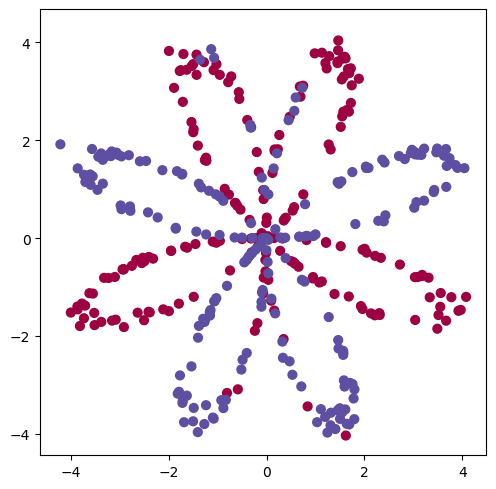

In [40]:
# Se muestran los datos
plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), s=40, cmap=plt.cm.Spectral)
plt.tight_layout()
plt.ylim([X[:,1].min() - 1, X[:, 1].max() + 1])
plt.xlim([X[:,0].min() - 1, X[:, 0].max() + 1])
plt.axis("square");

### 6.1. Red para clasificar los datos sintéticos

Para clasificar los datos sintéticos se utilizará una red de dos capas con la siguiente arquitectura:   

    Afin --> Tanh --> Afin --> Sigmoide

**Ejercicio:** Completar la implementación de los métodos `red_dos_capas_datos_sinteticos()` utilizando los métodos *forward* y *backward* adecuados para dicha arquitectura. Como función de costo se utilizará la *entropía cruzada*.

In [41]:
def red_dos_capas_datos_sinteticos(
    X, Y, dims_capas, num_iter=1000, learning_rate=1, mostrar_costo=False, semilla=100
):
    """
    Implementa una red neuronal de dos capas: Afin->Tanh->Afin->Sigmoide.

    Entrada:
        X: datos de entrada, de tamaño (N, d_0).
        Y: etiquetas (1 para la clase positiva y 0 para la negativa), de tamaño (N,1).
        dims_capas: dimensiones de las capas(d_0, d_1, d_2).
        num_iter: número de iteraciones del loop de optimización.
        learning_rate: learning rate utilizado para la actualización mediante descenso
                       por gradiente.
        mostrar_costo: Si vale True, se muestra el costo cada 100 iteraciones.
        semilla: semilla utilizada para la generación de números aleatorios.
    Salida:
        parametros: un diccionario de python que contiene W1, W2, b1, and b2.
    """

    np.random.seed(semilla)

    # Se inicializa el diccionario que almacena los gradientes
    gradientes = {}

    # Lista que almacena el costo
    costos = []

    # Número de muestras
    N = X.shape[0]

    d_0, d_1, d_2 = dims_capas

    # Se inicializan los parámetros del diccionario invocando a una de las funciones
    # previamente implementadas.
    parametros = inicializar_pesos(d_0, d_1, d_2, semilla=semilla)

    # Se obtienen W1, b1, W2 y b2 del diccionario de parámetros.
    W1 = parametros["W1"]
    b1 = parametros["b1"]
    W2 = parametros["W2"]
    b2 = parametros["b2"]

    # Loop (descenso por gradiente)
    for i in range(0, num_iter):

        #####################################################
        ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
        #####################################################

        # Propagación hacia adelante: Afin --> Tanh --> Afin --> Sigmoide.
        # Entradas: "X, W1, b1". Salidas: "X1, cache1, X2, cache2".
        X1, cache1 = afin_activacion_forward(X, W1, b1, 'tanh')
        X2, cache2 = afin_activacion_forward(X1, W2, b2, 'sigmoide') #implementa todo el forward
#Cuando se implementan redes profundas es conveniente agrupar varias funciones en una sola operación. 
#Implementar la propagación hacia adelante de una capa Afin --> Activacion. El método afin_activacion_forward() lo implementa, usando afin_forward

        # Se calcula el costo y se inicia la propagación hacia atrás
        #se usa entropia cruzada
        costo, dX2 = entropia_cruzada(X2,Y)
        
        # Propagación hacia atrás.
        # Entradas: "dX2, cache2, cache1". Salidas: "dX1, dW2, db2, dW1, db1, dX0 (no utilizado)".
        dX1, dW2, db2 = afin_activacion_backward(dX2, cache2, 'sigmoide')
        dX0, dW1, db1 = afin_activacion_backward(dX1, cache1, 'tanh')
#afin_activacion_backward hace todo el proceso para atras
        
        # Se almacenan los gradientes recientemente calculados en el diccionario
        gradientes["dW1"] = dW1
        gradientes["db1"] = db1
        gradientes["dW2"] = dW2
        gradientes["db2"] = db2

        # Se actualizan los parámetros
        parametros = actualizar_parametros(parametros, gradientes, learning_rate)

        # Se obtienen los nuevos W1, b1, W2 y b2 del diccionario de parámetros.
        W1 = parametros["W1"]
        b1 = parametros["b1"]
        W2 = parametros["W2"]
        b2 = parametros["b2"]

        #####################################################
        ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
        #####################################################

        # Se guarda la evolución del costo cada Ni iteraciones y se muestra cada 10 x Ni.
        Ni = 100
        if mostrar_costo:
            if i == 0:
                print("+--------+---------+")
                print("|  iter  |  costo  |")
                print("+--------+---------+")
            if i % Ni == 0:
                costos.append(costo)
            if i % (10 * Ni) == 0:
                print("| %6d | %0.5f |" % (i, np.squeeze(costo)))
            if i == (num_iter - 1):
                print("+--------+---------+")

    # Se grafica el costo
    plt.plot(np.squeeze(costos))
    plt.ylabel("costo")
    plt.xlabel("iteraciones (x" + str(Ni) + ")")
    plt.title("Evolución del costo (lr = " + str(learning_rate) + ")")
    plt.grid()
    plt.show()

    return parametros

+--------+---------+
|  iter  |  costo  |
+--------+---------+
|      0 | 0.69316 |
|   1000 | 0.28655 |
|   2000 | 0.26289 |
|   3000 | 0.23387 |
|   4000 | 0.22559 |
|   5000 | 0.22050 |
|   6000 | 0.21678 |
|   7000 | 0.21388 |
|   8000 | 0.21152 |
|   9000 | 0.20955 |
+--------+---------+


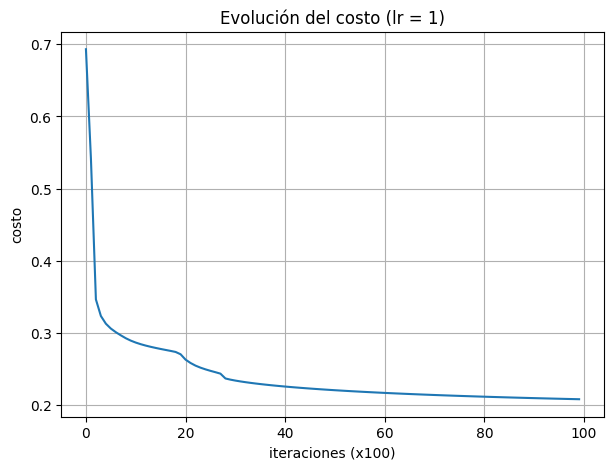

El entrenamiento demoró 1.66 segundos.


In [42]:
# Se definen las constantes que determinan la arquitectura de la red
d_0 = X.shape[1]
d_1 = 5
d_2 = 1
dims_capas = [d_0, d_1, d_2]

# Se entrena la red, con los parámetros por defecto el costo debería ser alrededor
# de 0.69 en la iteración 0 y menor que 0.25 en la 10000
inicio = time.time()
parametros_red_sinteticos = red_dos_capas_datos_sinteticos(
    X, Y, dims_capas=[d_0, d_1, d_2], num_iter=10000, mostrar_costo=True
)
fin = time.time()
print("El entrenamiento demoró %.2f segundos." % (fin - inicio))

### 6.2. Mostrar la frontera de decisión

Para mostrar la frontera de decisión se deberá completar primero la implementación del método `predecir_clase_datos_sinteticos()`. Dicho método utiliza los parámetros de la red recientemente encontrados para predecir la clase de los vectores de características pasados como parámetro. 

In [43]:
def predecir_clase_datos_sinteticos(X, parametros):
    """
    Esta función predice la clase de los datos sintéticos.

    Entrada:
        X: matriz de tamaño Nx2 que en cada fila contiene un vector de características.
        parametros: parámetros del modelo entrenado.

    Salida:
        p: vector de tamaño Nx1 que contiene las predicciones realizadas (0 ó 1)
    """

    # Se obtienen W1, b1, W2 y b2 del diccionario de parámetros.
    W1 = parametros["W1"]
    b1 = parametros["b1"]
    W2 = parametros["W2"]
    b2 = parametros["b2"]

    N = X.shape[0]
    p = np.zeros((N, 1))

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    # Se hace la propagación hacia adelante de los datos de entrada X. Tener en cuenta que la
    # arquitectura utilizada en la red fue Afin --> Tanh --> Afin --> Sigmoide
    # Deben poder hacerse en dos líneas de código, o poco más.
    # X1, cache1 =
    # X2, cache2 =
    X1, cache1 = afin_activacion_forward(X, W1, b1, 'tanh')
    X2, cache2 = afin_activacion_forward(X1, W2, b2, 'sigmoide')
    
    # Se obtienen las predicciones. Si la salida es mayor que 0.5 se asigna la clase 1, de lo
    # contrario se asigna la clase 0.
    # Deben poder hacerse en una línea de código, o poco más.
    p = np.rint(X2) #round real to the nearest integer

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return p

La siguiente celda muestra el porcentaje de acierto con el conjunto de entrenamiento. Verificar que para los parámetros por defecto es mayor al 90%.

In [44]:
predicciones_train = predecir_clase_datos_sinteticos(X, parametros_red_sinteticos)
porcentaje_aciertos = np.mean(predicciones_train == Y)
print("El porcentaje de aciertos es %.2f%%." % (100 * porcentaje_aciertos))

El porcentaje de aciertos es 91.00%.


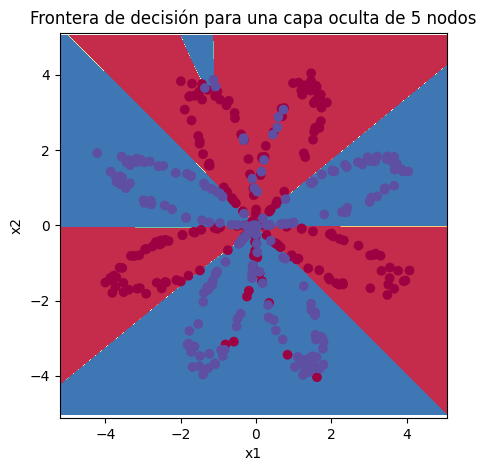

In [45]:
# Se muestra la frontera de decisión. Verificar que es razonable para el conjunto de entrenamiento.
funcion = lambda x: predecir_clase_datos_sinteticos(x, parametros_red_sinteticos)
fuaa.mostrar_frontera_decision(funcion, X, Y.flatten())
plt.title("Frontera de decisión para una capa oculta de " + str(d_1) + " nodos");

**Pregunta:** Variar la cantidad de nodos utilizados en la capa oculta y comentar sobre la influencia de dicho parámetro en la superficie de decisión obtenida.

**Respuesta:**  
2 nodos hace solo una diagonal, 3 ya tiene 90.7% mientras que 4 genera 91%,  demorando 0.20 segundos mas. (1.2 y 1.4)
5 nodos parecen ya sobreajustar, con mas datos podria hacer mas ruido.
...

## 7. Clasificación de imágenes
<img src="img/missing_cat.jpg" style="height:250px;border:3px solid;">
<p>Se utilizarán las funciones implementadas anteriormente para distinguir entre imágenes <i>con gatos</i> y <i>sin gatos</i>.</p>

### 7.1. Los datos

La siguiente celda carga los datos. La base cuenta con conjunto de imágenes para entrenamiento y un conjunto para test. En este caso las características a utilizar son directamente los valores de los píxeles de las imágenes. 

In [46]:
features_train, y_train, features_test, y_test, clases = fuaa.load_cats_dataset()
print("Se cargaron %d imágenes de entrenamiento: " % len(features_train), end="")
print(
    "%d de la clase %s y " % (np.sum(y_train == 1), clases[0].decode("utf-8")), end=""
)
print("%d de la clase %s." % (np.sum(y_train == 0), clases[1].decode("utf-8")))
print("Se cargaron %d imágenes de test: " % len(features_test), end="")
print("%d de la clase %s y " % (np.sum(y_test == 1), clases[0].decode("utf-8")), end="")
print("%d de la clase %s." % (np.sum(y_test == 0), clases[1].decode("utf-8")))
print("Las imágenes son de tamaño [%d, %d, %d]." % (features_train.shape[1:]))

Se cargaron 209 imágenes de entrenamiento: 72 de la clase non-cat y 137 de la clase cat.
Se cargaron 50 imágenes de test: 33 de la clase non-cat y 17 de la clase cat.
Las imágenes son de tamaño [64, 64, 3].


Cada vez que se ejecuta la siguiente celda se muestran `Nj` ejemplos de cada una de las dos clases. 

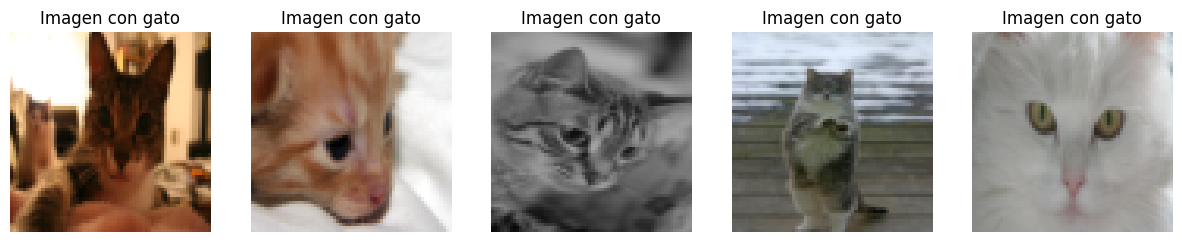

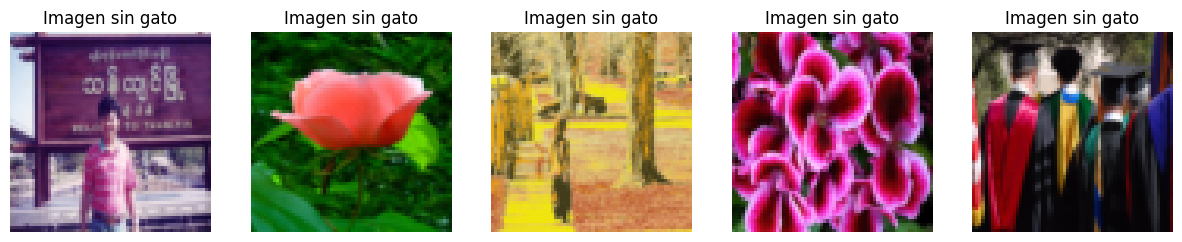

In [47]:
Nj = 5
indices_gatos = [i for i, label in enumerate(y_train) if label]
indices_no_gatos = [i for i, label in enumerate(y_train) if not label]

# Ejemplo de una imagen con gato
plt.figure(figsize=(15, 15))
for k in range(Nj):
    pos = np.random.randint(len(indices_gatos))
    plt.subplot(1, Nj, k + 1)
    plt.imshow(features_train[indices_gatos[pos]])
    plt.axis("off")
    plt.title("Imagen con gato")
plt.show()

# Ejemplo de una imagen sin gato
plt.figure(figsize=(15, 15))
for k in range(Nj):
    pos = np.random.randint(len(indices_no_gatos))
    plt.subplot(1, Nj, k + 1)
    plt.imshow(features_train[indices_no_gatos[pos]])
    plt.axis("off")
    plt.title("Imagen sin gato")
plt.show()

### 7.2. Red neuronal de dos capas para clasificar imágenes de gatos

**Ejercicio**: Completar la implementación del método `red_dos_capas_clasifica_gatos()` utilizando los métodos *forward* y *backward* adecuados para dicha arquitectura. Como función de costo se utilizará la *entropía cruzada*. La red deberá tener la siguiente estructura: 
<center><code>Afin --> ReLU --> Afin --> Sigmoide</code></center>

In [48]:
def red_dos_capas_clasifica_gatos(
    X, Y, dims_capas, num_iter=1000, learning_rate=1, mostrar_costo=False, semilla=100
):
    """
    Implementa una red neuronal de dos capas: Afin->Relu->Afin->Sigmoide.

    Entrada:
        X: datos de entrada, de tamaño (N, d_0).
        Y: etiquetas (1 para la clase positiva y 0 para la negativa), de tamaño (N,1).
        dims_capas: dimensiones de las capas(d_0, d_1, d_2).
        num_iter: número de iteraciones del loop de optimización.
        learning_rate: learning rate utilizado para la actualización mediante descenso por gradiente.
        mostrar_costo: Si vale True, se muestra el costo cada 100 iteraciones.
        semilla: semilla utilizada para la generación de números aleatorios.
    Salida:
        parametros: un diccionario de python que contiene W1, W2, b1, and b2.
    """

    np.random.seed(semilla)
    gradientes = {}  # se inicializa el diccionario que almacena los gradiantes
    costos = []  # lista que almacena el costo
    N = X.shape[0]  # número de muestras
    d_0, d_1, d_2 = dims_capas

    # Se inicializan los parámetros del diccionario llamando a una de las
    # funciones previamente implementadas
    parametros = inicializar_pesos(d_0, d_1, d_2, semilla=semilla)

    # Se obtienen W1, b1, W2 y b2 del diccionario de parámetros.
    W1 = parametros["W1"]
    b1 = parametros["b1"]
    W2 = parametros["W2"]
    b2 = parametros["b2"]

    # Loop (descenso por gradiente)

    for i in range(0, num_iter):

        #####################################################
        ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
        #####################################################
#-----------------------------------------------------------------------------------------------------------        
        # Propagación hacia adelante: Afin --> Tanh --> Afin --> Sigmoide.
        # Entradas: "X, W1, b1". Salidas: "X1, cache1, X2, cache2".
        X1, cache1 = afin_activacion_forward(X, W1, b1, 'relu')
        X2, cache2 = afin_activacion_forward(X1, W2, b2, 'sigmoide') #implementa todo el forward
#Cuando se implementan redes profundas es conveniente agrupar varias funciones en una sola operación. 
#Implementar la propagación hacia adelante de una capa Afin --> Activacion. El método afin_activacion_forward() lo implementa, usando afin_forward

        # Se calcula el costo y se inicia la propagación hacia atrás
        #se usa entropia cruzada
        costo, dX2 = entropia_cruzada(X2,Y)
        
        # Propagación hacia atrás.
        # Entradas: "dX2, cache2, cache1". Salidas: "dX1, dW2, db2, dW1, db1, dX0 (no utilizado)".
        dX1, dW2, db2 = afin_activacion_backward(dX2, cache2, 'sigmoide')
        dX0, dW1, db1 = afin_activacion_backward(dX1, cache1, 'relu')
#afin_activacion_backward hace todo el proceso para atras
        
        # Se almacenan los gradientes recientemente calculados en el diccionario
        gradientes["dW1"] = dW1
        gradientes["db1"] = db1
        gradientes["dW2"] = dW2
        gradientes["db2"] = db2

        # Se actualizan los parámetros
        parametros = actualizar_parametros(parametros, gradientes, learning_rate)

        # Se obtienen los nuevos W1, b1, W2 y b2 del diccionario de parámetros.
        W1 = parametros["W1"]
        b1 = parametros["b1"]
        W2 = parametros["W2"]
        b2 = parametros["b2"]


#-----------------------------------------------------------------------------------------------------------
        # Propagación hacia adelante: Afin --> ReLu --> Afin --> Sigmoide.
        # Entradas: "X, W1, b1". Salidas: "X1, cache1, X2, cache2".
        # X1, cache1 =
        # X2, cache2 =

        # Se calcula el costo y se inicia la propagación hacia atrás
        # costo, dX2 =

        # Propagación hacia atrás.
        # Entradas: "dX2, cache2, cache1". Salidas: "dX1, dW2, db2, dW1, db1, dX0 (no utilizado)".
        # dX1, dW2, db2 =
        # dX0, dW1, db1 =

        # Se almacenan los gradientes recientemente calculados en el diccionario
        # gradientes["W1"] =
        # gradientes["b1"] =
        # gradientes["W2"] =
        # gradientes["b2"] =

        # Se actualizan los parámetros
        # parametros =

        # Se obtienen los nuevos W1, b1, W2 y b2 del diccionario de parámetros.
        # W1 =
        # b1 =
        # W2 =
        # b2 =

        #####################################################
        ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
        #####################################################

        # Se guarda la evolución del costo cada Ni iteraciones y se muestra cada 10 x Ni.
        Ni = 50
        if mostrar_costo:
            if i == 0:
                print("+--------+---------+")
                print("|  iter  |  costo  |")
                print("+--------+---------+")
            if i % Ni == 0:
                costos.append(costo)
            if i % (10 * Ni) == 0:
                print("| %6d | %0.5f |" % (i, np.squeeze(costo)))
            if i == (num_iter - 1):
                print("+--------+---------+")

    # Se grafica el costo
    plt.plot(np.squeeze(costos))
    plt.ylabel("costo")
    plt.xlabel("iteraciones (x" + str(Ni) + ")")
    plt.title("Evolución del costo (lr = " + str(learning_rate) + ")")
    plt.grid()
    plt.show()

    return parametros

Se definen las constantes que determinan la arquitectura de la red. En este caso se usarán como características los valores de los píxeles de la imagen. La capa oculta tendrá 7 nodos y habrá un solo nodo en la capa de salida.

In [49]:
# Constantes que definen el modelo
d_0 = features_train.shape[1] * features_train.shape[2] * features_train.shape[3]
d_1 = 7
d_2 = 1
dims_capas = [d_0, d_1, d_2]

Se hace un *reshape* de las imágenes de entrenamiento para que las entradas a la red sean vectores unidimensionales. Además se las normaliza para que los valores estén en el rango [-0.5, 0.5] en vez del rango [0, 255] original.

In [50]:
# Se hace el reshape de las características
feat_train_flat = features_train.reshape(features_train.shape[0], -1)

# Se normalizan los datos para que las características queden en el rango [-0.5, 0.5]
train_x = feat_train_flat / 255.0 - 0.5

Ejecutar la siguiente celda y encontrar los parámetros del modelo. El costo debería decrecer con el paso de las iteraciones. Verificar que el  costo iteracion en la iteración (`iter`) 0 es aproximadamente 0.69, si no es así se recomienda para la ejecución con el cuadrado (⬛) de la barra superior del notebook y tratar de encontrar el error.

+--------+---------+
|  iter  |  costo  |
+--------+---------+
|      0 | 0.69463 |
|    500 | 0.02023 |
|   1000 | 0.01272 |
|   1500 | 0.00876 |
|   2000 | 0.00666 |
|   2500 | 0.00535 |
|   3000 | 0.00445 |
|   3500 | 0.00380 |
|   4000 | 0.00331 |
|   4500 | 0.00292 |
|   5000 | 0.00261 |
+--------+---------+


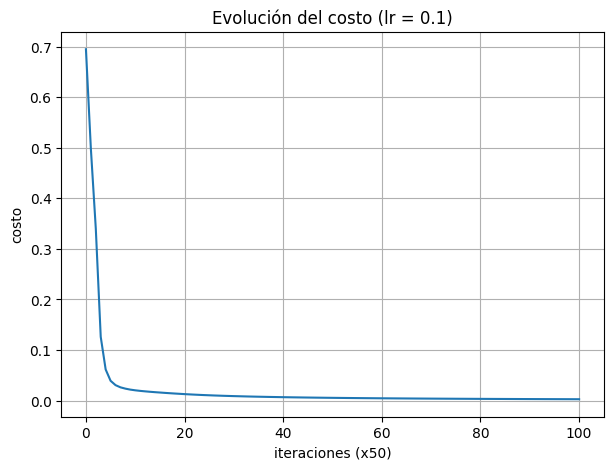

El entrenamiento demoró 68.63 segundos


In [51]:
inicio = time.time()
parametros_red_gatos = red_dos_capas_clasifica_gatos(
    train_x,
    y_train,
    dims_capas=[d_0, d_1, d_2],
    learning_rate=0.1,
    num_iter=5001,
    mostrar_costo=True,
)
fin = time.time()
print("El entrenamiento demoró %.2f segundos" % (fin - inicio))

Si la función de costo decreció por debajo de 0.003 al acercarse la iteración 5000 entonces la implementación es correcta y has podido entrenar la red neuronal. A continuación veremos qué tan bien funcionan los parámetros encontrados con el conjunto de entrenamiento. 

**Ejercicio:** Completar la implementación del método `clasificar_gato()` para que dado un conjunto de imágenes de entrada y los parámetros de la red encontrados durante el entrenamiento devuelva si pertenece a la clase gato o no.

In [56]:
def clasificar_gato(X, parametros):
    """
    Esta función predice si las imágenes almacenadas en el vector X son gatos o no

    Entrada:
        X: matriz de tamaño N x d_0 que contiene N imágenes almacenadas una por fila
        parametros: parámetros óptimos encontrados al entrenar la red

    Salida:
        p: predicciones realizadas por la red para las imágenes en X (1 si es gato, 0 si no)
    """

    # Se obtienen W1, b1, W2 y b2 del diccionario de parámetros.
    W1 = parametros["W1"]
    b1 = parametros["b1"]
    W2 = parametros["W2"]
    b2 = parametros["b2"]

    N = X.shape[0]
    p = np.zeros((N, 1))

    #####################################################
    ####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    # Se realiza la propagación hacia adelante de las imágenes de entrada
    # Deben poder hacerse en dos líneas de código, o poco más.
    X1, cache1 = afin_activacion_forward(X, W1, b1, 'relu')
    X2, cache2 = afin_activacion_forward(X1, W2, b2, 'sigmoide') #implementa todo el forward
    # Se realiza la predicción
    # Deben poder hacerse en una línea de código, o poco más.
    p = np.rint(X2)

    #####################################################
    ####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
    #####################################################

    return p

Verificar que la red entrenada hace un trabajo fantástico con el conjunto de entrenamiento.

In [57]:
predicciones_train = clasificar_gato(train_x, parametros_red_gatos)
accuracy_train = 100 * np.mean((predicciones_train == y_train))
print("Porcentaje de acierto en entrenamiento: %.2f%%." % accuracy_train)

Porcentaje de acierto en entrenamiento: 100.00%.


¿Cerca del 100% de acierto? ¡Bien hecho! Excelente trabajo. Ahora sólo resta evaluar con el conjunto reservado para test.

In [58]:
#####################################################
####### EMPIEZA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################

# Se hace el reshape de las características
feat_test_flat = features_test.reshape(features_test.shape[0], -1)
# Se normalizan los datos para que las características queden en el rango [-0.5, 0.5]
test_x = feat_test_flat/255. -0.5
# Clasificar datos de test con la red entrenada
pred_test = clasificar_gato(test_x, parametros_red_gatos)
# accuracy_test =
accuracy_test = np.mean((pred_test == y_test))
 #???????????????????????????????????????????????????????????????????????????' que es tod esto

#####################################################
####### TERMINA ESPACIO PARA COMPLETAR CODIGO #######
#####################################################

print("Porcentaje de acierto en test: %.2f%%." % accuracy_test)

Porcentaje de acierto en test: 0.68%.


¿Mucho mejor que tirar una moneda? Seguro que si.

**Ejercicio:** Comente cuáles son a su criterio las razones que explican el resultado obtenido y comente al menos un par de estrategias que de haberse implementado seguramente habrían redituado en un mejor desempeño con el conjunto de test. 

**Respuesta:** 

...

### 7.3. Visualizar imágenes del conjunto de test y predicciones correctas y erróneas
Mostrar las imágenes del conjunto de test identificando si se cometió error en la clasificación.

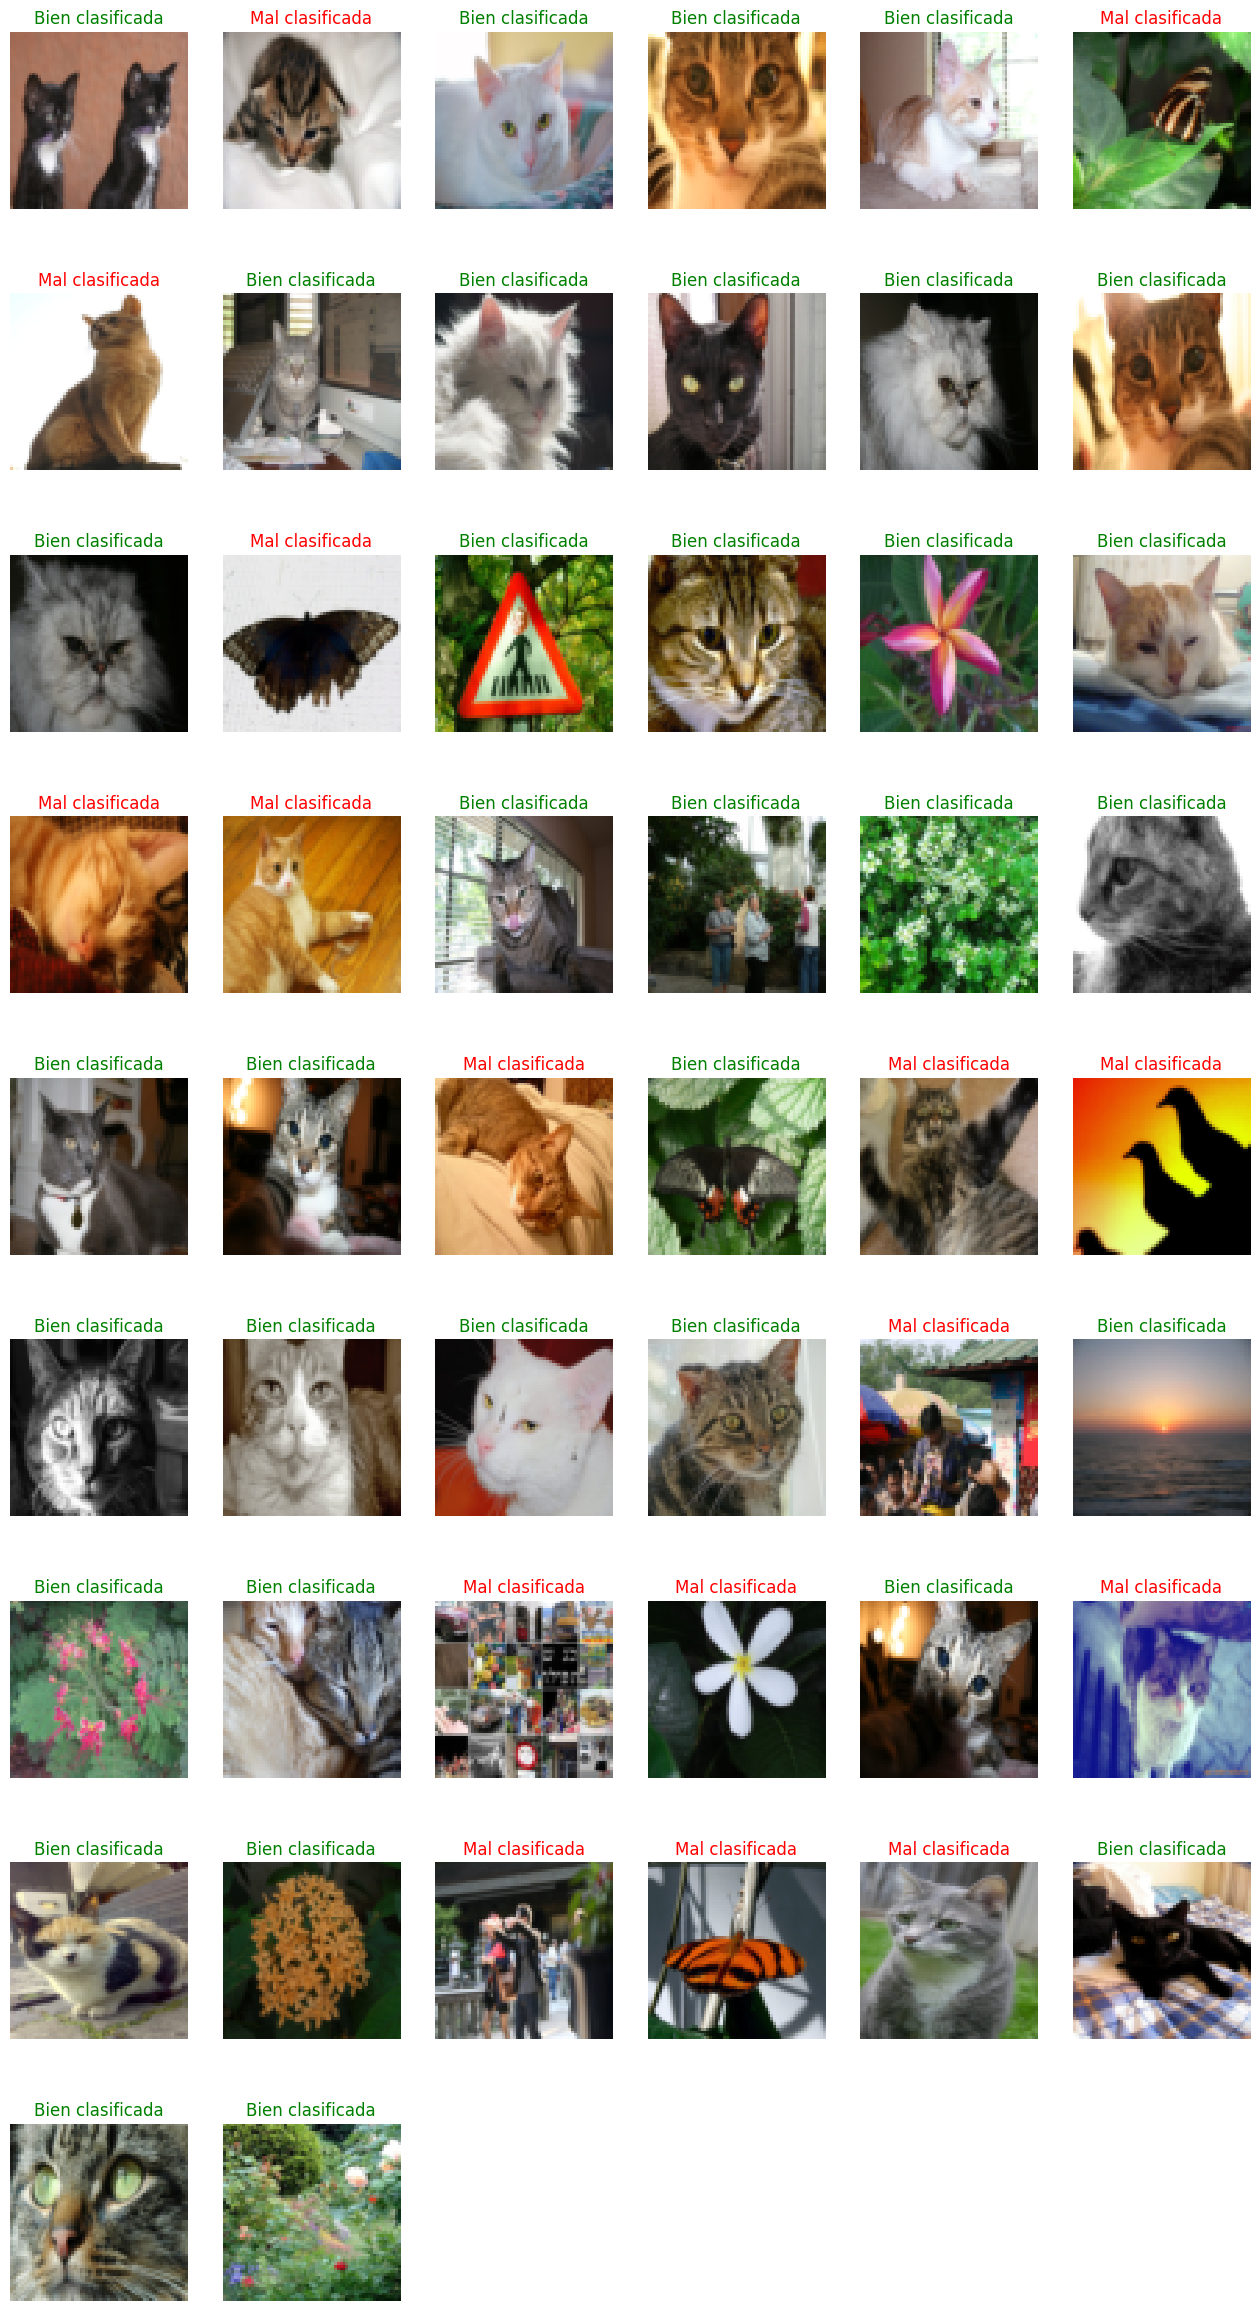

In [59]:
ind_error = np.where(pred_test != y_test)
N_test = len(y_test)
n_cols = 6
n_rows = int(N_test // n_cols + 1)
fig = plt.figure(figsize=(16, 30))
for k in range(N_test):
    img = features_test[k]

    # tsub es el título de cada una de la N_test imágenes que se muestra
    # con un color dado por tcolor. Se debe hacer la asignación correcta.
    tsub = "¿Bien/Mal clasificada?"
    tcolor = "black"
    (tsub, tcolor) = (
        ("Mal clasificada", "red")
        if (pred_test[k] != y_test[k])
        else ("Bien clasificada", "green")
    )

    plt.subplot(n_rows, n_cols, k + 1)
    plt.imshow(img)
    plt.subplot(n_rows, n_cols, k + 1).set_title(tsub, color=tcolor)
    plt.axis("off")

# Ejercicio 2: Jugando con Tensorflow playground
<a id="Ejercicio2"></a>

**Parte 1.** Ejecutar el [modelo parte 1](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.68341&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=false&discretize_hide=false) y corroborar que no es capaz de separar correctamente los datos. Explicar.

**Respuesta:** esto equivale a tener w1 y w2, lo cual equivale a usar 1 perceptron, cuya division sera el plano en dos partes.

**Parte 2.** Aumentar el número de neuronas en capa oculta a dos. ¿Se pueden separar los datos? 

**Respuesta:** no

**Parte 3.** Aumentar el número de neuronas en capa oculta a tres utilizando como función de activación ReLU. ¿Es este modelo adecuado para separar los datos? Ejecutar varias veces cambiando la inicialización.

**Respuesta:** no, puede en algunos casos dividir en dos, que pasa en la parte blanca?

**Parte 4.** Probar ahora con la siguiente arquitectura:
- Primera capa oculta con tres neuronas
- Segunda capa oculta con tres neuronas
- Tercera capa oculta con dos neuronas

¿Este modelo se ajusta mejor a los datos? ¿Converge más rápido y con mayor asiduidad que el de la parte 3? A los efectos de este ejercicio consideraremos que el modelo converge si el error de test es menor a 0.177.

**Respuesta:** converge. 

**Parte 5.** Utilizando sólamente $X_1$ y $X_2$ como características construir un modelo que separe adecuadamente los datos con [distribución en espiral](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.63187&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&showTestData_hide=false&discretize_hide=false). Para ello puede variar libremente el número de capas ocultas y la cantidad de nodos por capa oculta. Indique además los valores elegidos para los siguientes parámetros y las razones que guiaron la elección:
- learning rate
- activación
- tipo de regularización
- factor de regularización

**Respuesta:**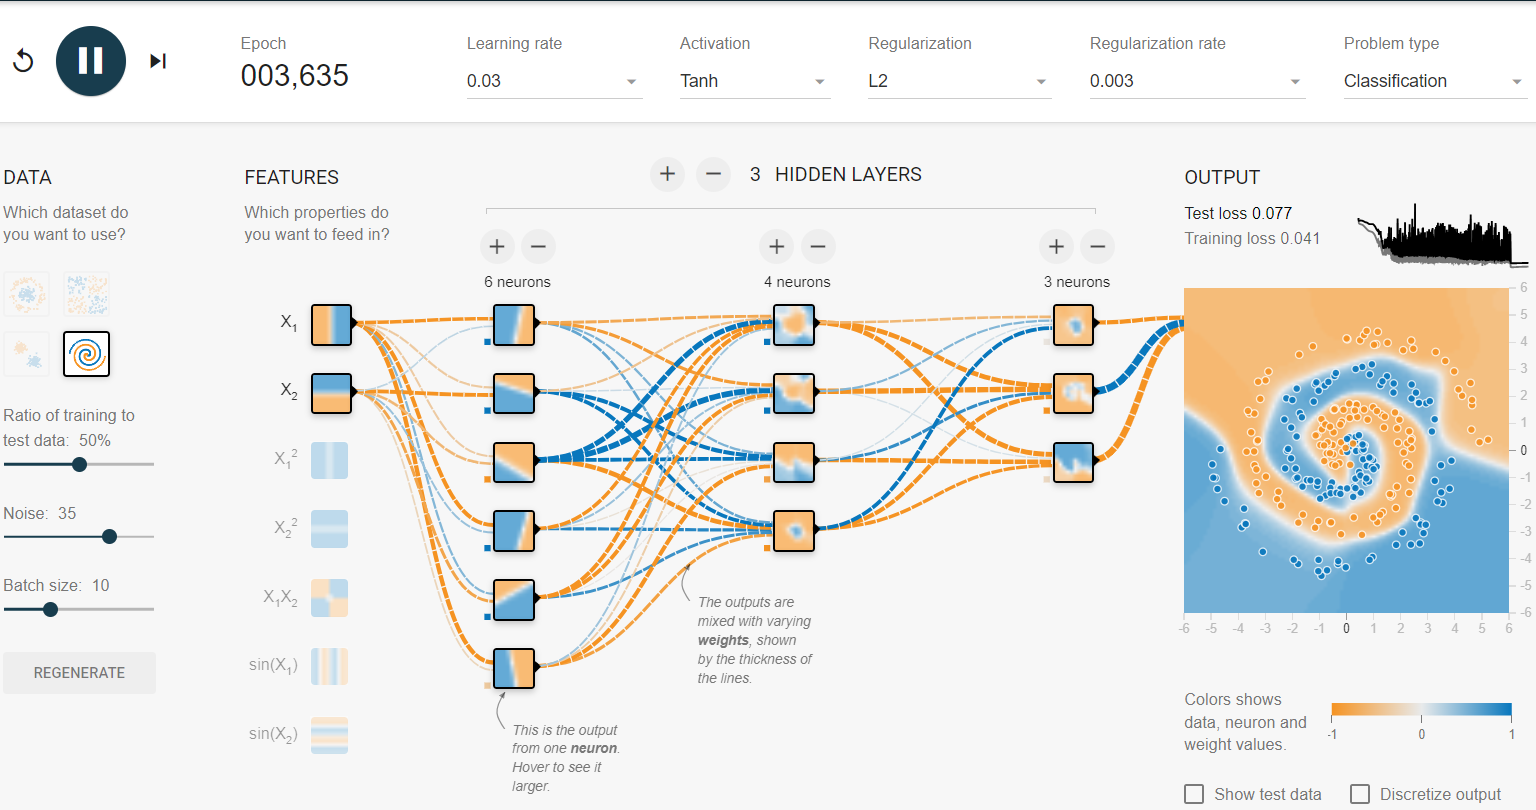
6,3,2 - 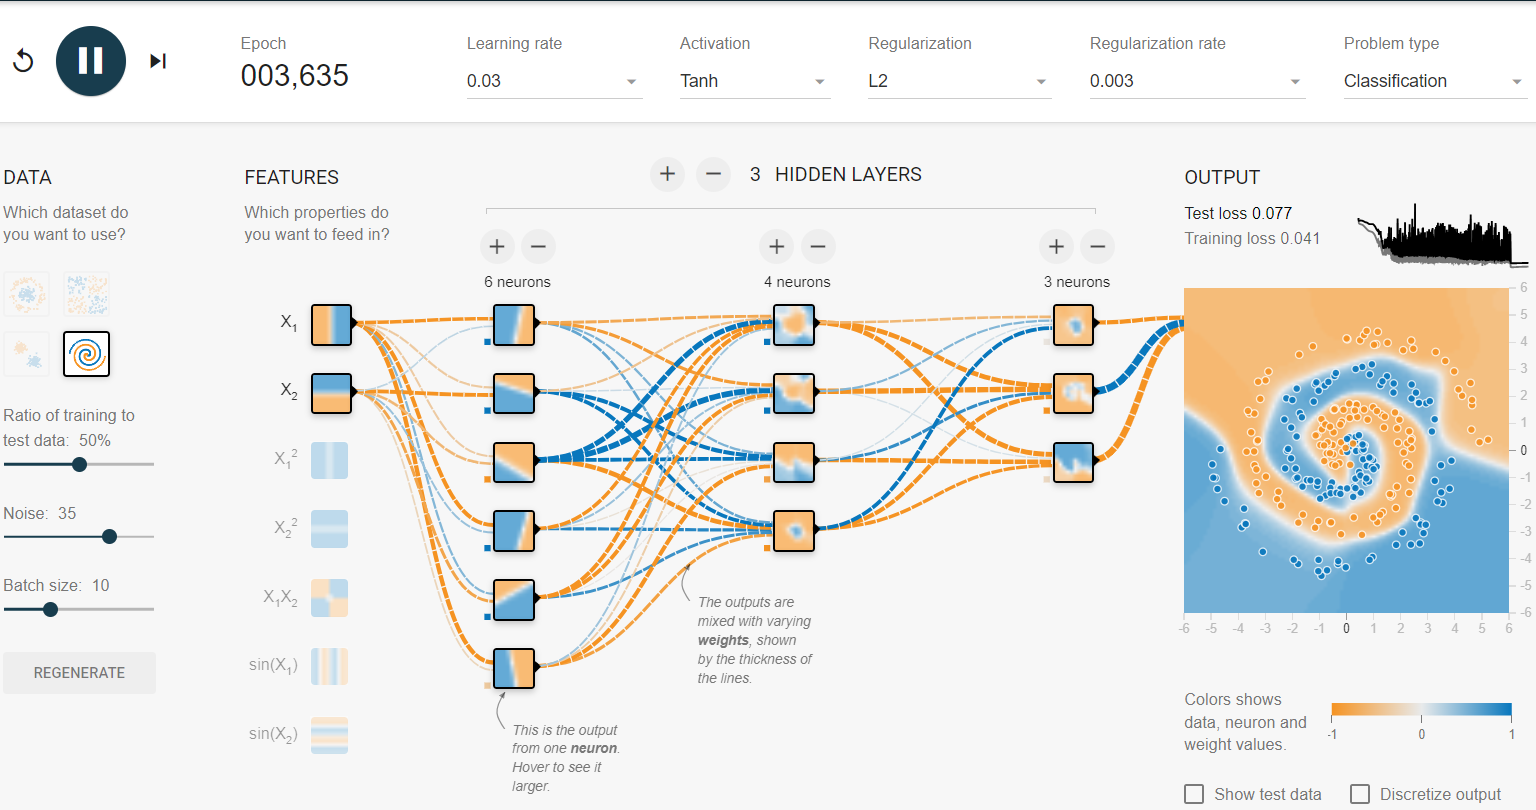

**Parte 6.** La extracción de características puede ser útil aún cuando se trabaja con clasificadores de gran capacidad expresiva como las redes neuronales. Utilizando las transformaciones de características a la entrada que considere convenientes, encontrar la arquitectura de red con menor cantidad de nodos que produzca un error con el conjunto de test menor a 0.1. *Sugerencia:*  guarde registro del momento. 

**Respuesta:**...

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos de Boston
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
# Unir los datos (ejemplo simple, ajusta según tu caso)
datos = pd.merge(datos_medidas, datos_simulaciones, on="frecuencia")

# Normalización (ejemplo con MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(datos)

# Características: frecuencia, real y imaginario de las simulaciones
X = datos_normalizados[:, :3]  # Ajusta los índices según tus datos

# Etiquetas: real e imaginario de las medidas
y = datos_normalizados[:, 3:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos de Boston
boston = datasets.load_boston()
X = boston.data
y = boston.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)